In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Carregar o dataset
df = pd.read_csv('ecommerce_sales_data.csv')

In [4]:
# Garantir que a coluna 'Date' seja interpretada como data
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Exibir uma amostra dos dados
df.head()

,OrderID,Date,ProductID,ProductCategory,Quantity,UnitPrice,CustomerID,Region,TotalSales
0,1,2022-07-01,1069,Electronics,7,6.76,10208,East,47.32
1,2,2023-08-01,1069,Toys,1,74.62,10021,Central,74.62
2,3,2023-03-01,1003,Beauty,2,185.61,10677,South,371.22
3,4,2022-11-01,1093,Clothing,4,49.59,10610,West,198.36
4,5,2022-08-01,1074,Books,1,128.70,10207,Central,128.70


In [6]:
# Verificar se há valores ausentes no dataset
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

Valores ausentes por coluna:
 OrderID            0
Date               0
ProductID          0
ProductCategory    0
Quantity           0
UnitPrice          0
CustomerID         0
Region             0
TotalSales         0
dtype: int64


In [37]:
# Verificar o número de linhas duplicadas no dataset
num_duplicated = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicated}")
# Exibir as linhas duplicadas (opcional)
duplicated_rows = df[df.duplicated()]
print("Linhas duplicadas:\n", duplicated_rows)

Número de linhas duplicadas: 0
Linhas duplicadas:
 Empty DataFrame
Columns: [OrderID, Date, ProductID, ProductCategory, Quantity, UnitPrice, CustomerID, Region, TotalSales, Month, Year]
Index: []


In [7]:
# Remover duplicatas
df.drop_duplicates(inplace=True)

In [8]:
# Verificar os tipos de dados e ajustá-los se necessário
print("\nTipos de dados das colunas:\n", df.dtypes)


Tipos de dados das colunas:
 OrderID                     int64
Date               datetime64[ns]
ProductID                   int64
ProductCategory            object
Quantity                    int64
UnitPrice                 float64
CustomerID                  int64
Region                     object
TotalSales                float64
dtype: object


In [9]:
# Garantir que os dados numéricos estejam no formato correto
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [10]:
# Reexibir uma amostra dos dados após a limpeza
df.head()

,OrderID,Date,ProductID,ProductCategory,Quantity,UnitPrice,CustomerID,Region,TotalSales
0,1,2022-07-01,1069,Electronics,7,6.76,10208,East,47.32
1,2,2023-08-01,1069,Toys,1,74.62,10021,Central,74.62
2,3,2023-03-01,1003,Beauty,2,185.61,10677,South,371.22
3,4,2022-11-01,1093,Clothing,4,49.59,10610,West,198.36
4,5,2022-08-01,1074,Books,1,128.70,10207,Central,128.70


In [11]:
# 2. Análise Exploratória de Dados (EDA)
df.describe()

,OrderID,Date,ProductID,Quantity,UnitPrice,CustomerID,TotalSales
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2022-12-30 22:29:16.800000,1049.161000,5.013000,101.763220,10509.859000,508.065740
min,1.000000,2022-01-01 00:00:00,1000.000000,1.000000,5.000000,10003.000000,7.370000
25%,250.750000,2022-06-01 00:00:00,1024.000000,3.000000,53.390000,10260.500000,174.072500
50%,500.500000,2023-01-01 00:00:00,1048.000000,5.000000,102.270000,10511.000000,389.560000
75%,750.250000,2023-07-08 18:00:00,1074.000000,7.000000,149.770000,10771.250000,751.072500
max,1000.000000,2024-01-01 00:00:00,1099.000000,9.000000,199.910000,10999.000000,1795.140000
std,288.819436,NaN,29.223057,2.596839,56.015281,288.740413,409.818492


In [8]:
# Tendência de vendas ao longo do tempo
sales_trend = df.groupby('Date')['TotalSales'].sum()

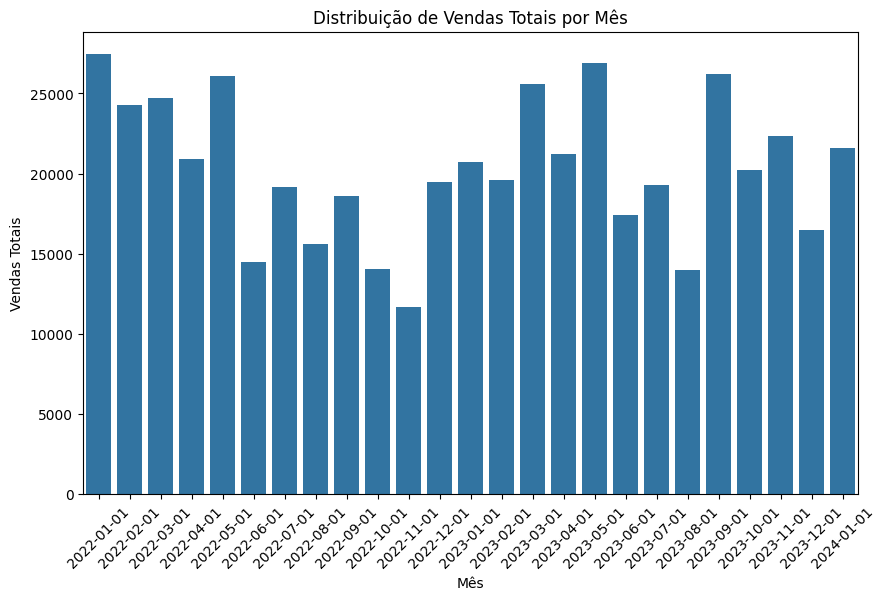

In [39]:
# Criar uma coluna que representa apenas o mês e o ano
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Agrupar as vendas totais por mês
monthly_sales = df.groupby('Month').agg({'TotalSales': 'sum'}).reset_index()

# Plotar a distribuição de vendas por mês
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='TotalSales')
plt.title('Distribuição de Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

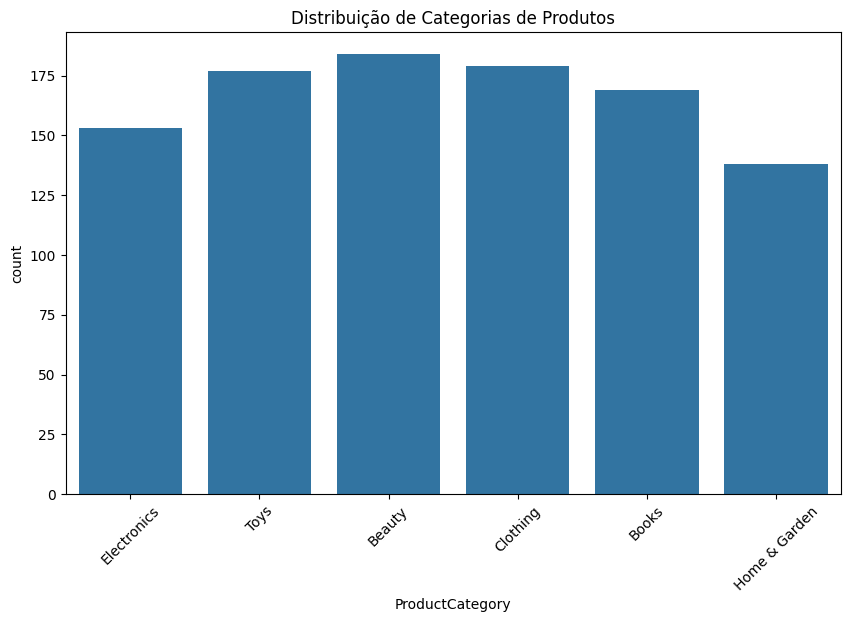

In [12]:
# Distribuição de vendas por categoria de produto
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProductCategory')
plt.title('Distribuição de Categorias de Produtos')
plt.xticks(rotation=45)
plt.show()

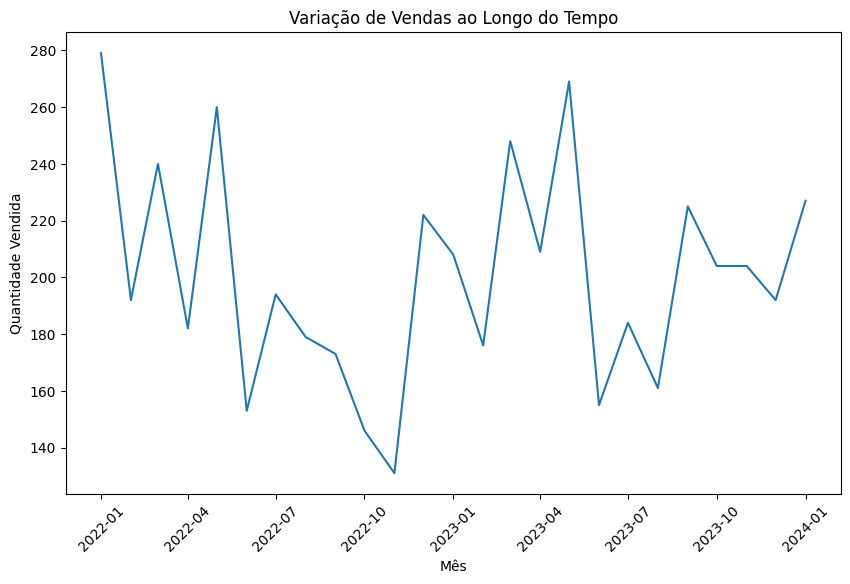

In [15]:
# Criar uma coluna de mês no formato datetime
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Agrupar as vendas mensais
monthly_sales = df.groupby('Month').agg({'Quantity': 'sum'}).reset_index()

# Plot da variação de vendas ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Quantity')
plt.title('Variação de Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Contagem de vendas por categoria de produto
category_sales = df['ProductCategory'].value_counts()
print("\nVendas por Categoria de Produto:")
print(category_sales)


Vendas por Categoria de Produto:
ProductCategory
Beauty           184
Clothing         179
Toys             177
Books            169
Electronics      153
Home & Garden    138
Name: count, dtype: int64


In [17]:
# Teste de hipótese para comparar vendas entre as categorias Beauty e Clothing
beauty_sales = df[df['ProductCategory'] == 'Beauty']['TotalSales']
clothing_sales = df[df['ProductCategory'] == 'Clothing']['TotalSales']

# Teste T de duas amostras independentes
t_stat, p_value = stats.ttest_ind(beauty_sales, clothing_sales, equal_var=False)

In [18]:
print("\nTeste de Hipótese: Comparação entre Beauty e Clothing")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Teste de Hipótese: Comparação entre Beauty e Clothing
T-statistic: -2.4257712849277757
P-value: 0.015799896310277436


In [19]:
if p_value < 0.05:
    print("Há uma diferença estatisticamente significativa entre as vendas de Beauty e Clothing.")
else:
    print("Não há uma diferença estatisticamente significativa entre as vendas de Beauty e Clothing.")

Há uma diferença estatisticamente significativa entre as vendas de Beauty e Clothing.


In [21]:
# Modelagem de Machine Learning (Previsão de Vendas)
# Preparação dos dados para a previsão
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [22]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X = df[['Month', 'Year', 'Quantity', 'UnitPrice']]  # Variáveis explicativas
y = df['TotalSales']  # Variável alvo

In [23]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

In [26]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print("\nAvaliação do Modelo de Regressão Linear:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")


Avaliação do Modelo de Regressão Linear:
Mean Squared Error (MSE): 23026.04425341346
R-Squared: 0.8616888598107098


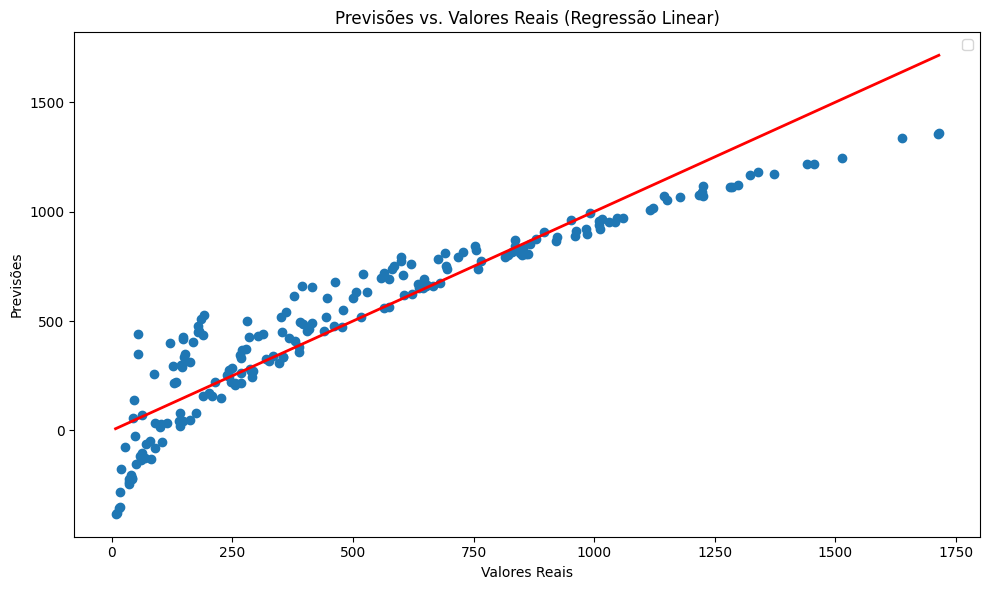

In [28]:
# Exibir previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Previsões vs. Valores Reais (Regressão Linear)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
# Criar datas futuras (próximos 12 meses, por exemplo)
future_dates = pd.date_range(start=df['Date'].max(), periods=13, freq='M')[1:]

In [30]:
# Criar um dataframe com as próximas datas
future_df = pd.DataFrame({
    'Date': future_dates,
    'Month': future_dates.month,
    'Year': future_dates.year,
    'Quantity': np.random.randint(df['Quantity'].min(), df['Quantity'].max(), size=len(future_dates)),
    'UnitPrice': np.random.uniform(df['UnitPrice'].min(), df['UnitPrice'].max(), size=len(future_dates))
})

In [31]:
# Fazer previsões para as futuras datas
future_sales = model.predict(future_df[['Month', 'Year', 'Quantity', 'UnitPrice']])

In [32]:
# Adicionar as previsões ao dataframe de futuras vendas
future_df['TotalSales'] = future_sales

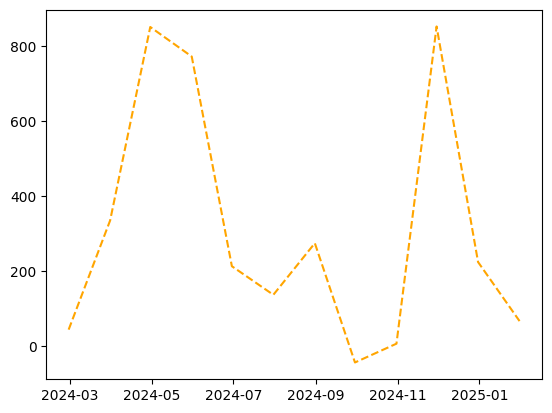

In [50]:
# Plotar as previsões futuras
plt.plot(future_df['Date'], future_df['TotalSales'], label='Previsões Futuras', color='orange', linestyle='--')

In [51]:
# Criar uma coluna de 'Month' se ainda não existir no conjunto de teste
X_test['Month'] = df.loc[X_test.index, 'Date'].dt.to_period('M')

In [52]:
# Criar um DataFrame com os valores previstos e o mês
predicted_sales = pd.DataFrame({
    'Month': X_test['Month'],
    'PredictedSales': y_pred
})

In [53]:
# Agrupar as previsões por mês e somar os valores
predicted_sales_grouped = predicted_sales.groupby('Month').agg({'PredictedSales': 'sum'}).reset_index()

In [54]:
# Ordenar a tabela por mês
predicted_sales = predicted_sales.sort_values(by='Month').reset_index(drop=True)

# Exibir a tabela com os meses e valores previstos
predicted_sales_grouped

,Month,PredictedSales
0,2022-01,6786.556063
1,2022-02,7359.085479
2,2022-03,4012.685217
3,2022-04,1677.745688
4,2022-05,5583.360874
5,2022-06,1002.111468
6,2022-07,2100.736087
7,2022-08,3461.099528
8,2022-09,2189.231803
9,2022-10,1901.023813


In [56]:
#Dataset com as previsões futuras
future_df

,Date,Month,Year,Quantity,UnitPrice,TotalSales
0,2024-02-29,2,2024,4,33.269280,42.959350
1,2024-03-31,3,2024,2,135.343043,334.702629
2,2024-04-30,4,2024,7,133.507905,851.951396
3,2024-05-31,5,2024,5,160.601339,772.978141
4,2024-06-30,6,2024,3,90.292712,212.431170
5,2024-07-31,7,2024,5,32.477052,136.080422
6,2024-08-31,8,2024,2,124.815347,274.082588
7,2024-09-30,9,2024,3,39.297289,-44.841089
8,2024-10-31,10,2024,1,92.527386,5.410125
9,2024-11-30,11,2024,6,157.574577,853.337428
